In [ ]:
!unzip "/content/fake-news.zip"

Archive:  /content/fake-news.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
#load the data using pandas
data = pd.read_csv('train.csv')

In [ ]:
#check for missing values in each column
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
#drop the missing values
data = data.dropna()

In [ ]:
#confirm for missing values agian
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
#create dependent and independent variables
X = data.iloc[:, : -1]
y = data.iloc[:, -1]

In [ ]:
X.head(20)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [ ]:
y.head(20)

0     1
1     0
2     1
3     1
4     1
5     0
7     0
9     0
10    0
11    0
12    1
13    1
14    1
15    0
16    0
17    1
18    1
19    0
21    0
22    0
Name: label, dtype: int64

In [ ]:
X.shape

(18285, 4)

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
#import libraries
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
#creat vocabularies of size 5000
vocabulary_size = 5000

#make a copy of independent variables
messages = X.copy()

print(messages['title'][1])

FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart


In [ ]:
#reset the index of independent variable to its default
messages.reset_index(inplace = True)

## Data Proprocessing

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
import tqdm as tqdm

porte_stemmer = PorterStemmer()
corpos = []

for word in range(len(messages)):
  review = re.sub('[^a-zA-Z]', ' ', messages['title'][word])
  review = review.lower()
  review = review.split()

  review = [porte_stemmer.stem(token) for token in review if not token in stopwords.words('english')]
  review = ' '.join(review)
  corpos.append(review)




In [ ]:
#one hot encoding
one_hot_representation = [one_hot(word, vocabulary_size) for word in corpos]

In [ ]:
one_hot_representation[0]

[3890, 653, 2083, 4819, 204, 804, 4567, 3718, 1671, 4356]

In [ ]:
#set the maximum word length
set_length = 20

#add padding to have unified word length
embedding_representation = pad_sequences(one_hot_representation, padding = 'pre', maxlen = set_length)

print(embedding_representation)

[[   0    0    0 ... 3718 1671 4356]
 [   0    0    0 ... 2917 3389 1823]
 [   0    0    0 ...  473 2054 4344]
 ...
 [   0    0    0 ... 3955 2845 3843]
 [   0    0    0 ... 2500 2048 2933]
 [   0    0    0 ... 4590 3643 2788]]


In [ ]:
embedding_representation[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3890,
        653, 2083, 4819,  204,  804, 4567, 3718, 1671, 4356], dtype=int32)

## Model building

In [ ]:
## Creating model
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(vocabulary_size,embedding_vector_features,input_length=set_length))
model.add(Dropout(0.9))
model.add(LSTM(100))
#model.add(Dropout(0.9))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
print(model.summary())

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 20, 40)            200000    
                                                                 
 dropout_48 (Dropout)        (None, 20, 40)            0         
                                                                 
 lstm_30 (LSTM)              (None, 100)               56400     
                                                                 
 dense_30 (Dense)            (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
#convert the variable back to numpy
X_final = np.array(embedding_representation)
y_final = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25)

In [ ]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=40,batch_size=64)

Epoch 1/40
215/215 [==============================] - 2s 8ms/step - loss: 0.1603 - accuracy: 0.9364 - val_loss: 0.1864 - val_accuracy: 0.9210
Epoch 2/40
215/215 [==============================] - 2s 7ms/step - loss: 0.1585 - accuracy: 0.9371 - val_loss: 0.1887 - val_accuracy: 0.9210
Epoch 3/40
215/215 [==============================] - 2s 7ms/step - loss: 0.1422 - accuracy: 0.9433 - val_loss: 0.1855 - val_accuracy: 0.9269
Epoch 4/40
215/215 [==============================] - 2s 7ms/step - loss: 0.1413 - accuracy: 0.9433 - val_loss: 0.1820 - val_accuracy: 0.9245
Epoch 5/40
215/215 [==============================] - 1s 6ms/step - loss: 0.1419 - accuracy: 0.9424 - val_loss: 0.1905 - val_accuracy: 0.9250
Epoch 6/40
215/215 [==============================] - 2s 8ms/step - loss: 0.1399 - accuracy: 0.9454 - val_loss: 0.1976 - val_accuracy: 0.9241
Epoch 7/40
215/215 [==============================] - 2s 10ms/step - loss: 0.1291 - accuracy: 0.9488 - val_loss: 0.1898 - val_accuracy: 0.9221
Epoch

In [ ]:
import numpy as np
from sklearn import metrics
# Predict probabilities for each class
y_prob = model.predict(X_test)

# Use a threshold of 0.5 to convert probabilities to binary labels
y_pred = np.where(y_prob > 0.5, 1, 0)

# Compute the confusion matrix
confusion_m = metrics.confusion_matrix(y_test, y_pred)


143/143 [==============================] - 1s 2ms/step


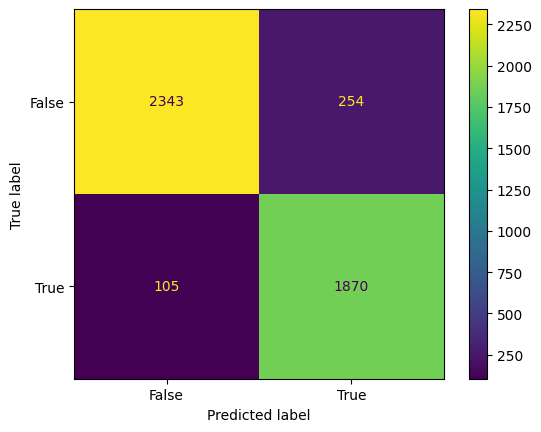

In [ ]:
# Confusion matrix of Results from Logistic Regression classification
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_m,
											display_labels=[False, True])

cm_display.plot()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9214785651793526